# **Project Name**

## Shopper Spectrum: Customer Segmentation and Product Recommendation in E-Commerce

##### **Domain**    - E-Commerce and Retail Analytics
##### **Project Type**    - Unsupervised Machine Learning - Clustering 
##### **Contribution**    - Individual
##### **Team Member 1 -** Uttam Singh Chaudhary

# **Project Summary -**

### Objective:
This project aims to leverage machine learning techniques to analyze e-commerce transaction data, segment customers based on their purchasing behavior using RFM analysis, and recommend similar products to enhance personalization. The ultimate goal is to empower business stakeholders with insights that support targeted marketing, customer retention, and improved product discovery, thereby increasing revenue and customer satisfaction.

### Dataset Overview:
The dataset comprises over 500,000 transaction records from an online retail business, including fields such as InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country. After thorough data preprocessing, the dataset was cleaned to remove missing CustomerID entries, canceled transactions, and records with negative or zero quantity or price.

### Key Project Tasks and Execution:
1. **Exploratory Data Analysis (EDA):**

EDA was conducted to extract initial insights. Key visualizations included:
- Transaction volume by country.
- Top-selling products.
- Purchase trends over time.
- Distribution of total transaction value (TotalPrice).
- RFM (Recency, Frequency, Monetary) distributions.

Each visualization was accompanied by business-focused insights. For example, we identified that a few products dominated sales and that customer behavior varied significantly by region.

2. **Customer Segmentation via Clustering:**
The RFM model was constructed as follows:
- **Recency:** Days since last purchase.
- **Frequency:** Number of purchases.
- **Monetary:** Total spending.

These features were standardized and used in three clustering algorithms:

- **KMeans** (final model chosen),
- **DBSCAN,**
- **Hierarchical Clustering.**

**KMeans achieved the best trade-off** between accuracy and business utility, with a silhouette score of 0.616 and the ability to predict on new customer data. Clusters were interpreted and labeled:

- **High-Value** (frequent, recent, big spenders),
- **Regular** (steady purchasers),
- **Occasional** (rare, low spenders),
- **At-Risk** (long inactive, low spenders).

These segments are valuable for targeted campaigns, retention strategies, and upselling.

3. **Product Recommendation System:**\
An **item-based collaborative filtering model** was implemented using cosine similarity. The purchase history was transformed into a **pivot table** (Product vs Customer matrix), enabling the recommendation of top 5 similar products for any given product.

Key deliverables:
- Saved similarity matrix for fast lookup.
- Real-time recommendations based on product inputs.

### Streamlit Web Application:
A user-friendly Streamlit app was developed with two core modules:

1. **Product Recommendation Module:**
- Input: Product name.
- Output: Top 5 similar products based on purchase history.

2. **Customer Segmentation Module:**
- Input: Recency, Frequency, Monetary values.
- Output: Predicted customer segment using the KMeans model.

Both modules provide real-time outputs, styled UI, and practical business utility.

### Business Impact:
- **Improved customer targeting:** Each segment can be addressed with specific marketing strategies.
- **Retention of high-value customers:** Enables proactive engagement with loyal spenders.
- **Personalized product discovery:** Increases user satisfaction and potential sales.
- **Operational efficiency:** Supports demand forecasting and inventory management.

### Technical Stack:
- **Python, Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn, Streamlit.**

- Machine Learning: **KMeans Clustering, Collaborative Filtering, Cosine Similarity.**

- Deployment: **Streamlit, Pickle/Joblib** for model saving.

# **GitHub Link -**

Provide your GitHub Link here.



# **Problem Statement**


The global e-commerce industry generates vast amounts of transaction data daily, offering valuable insights into customer purchasing behaviors. Analyzing this data is essential for identifying meaningful customer segments and recommending relevant products to enhance customer experience and drive business growth. This project aims to examine transaction data from an online retail business to uncover patterns in customer purchase behavior, **segment customers** based on **Recency**, **Frequency**, and **Monetary (RFM) analysis**, and develop a product **recommendation system** using **collaborative filtering** techniques.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries


# for data manipulation
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for datetime manipulation
import datetime as dt

# for scaling data
from sklearn.preprocessing import StandardScaler

# for clustering
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# for computing similarity measure
from sklearn.metrics.pairwise import cosine_similarity

# for evaluating clustering algorithms
from sklearn.metrics import silhouette_score

# for saving model
import joblib

### Dataset Loading

In [2]:
# Load Dataset
df0 = pd.read_csv("online_retail.csv")
print("Dataset Loaded Successfully!!!")

Dataset Loaded Successfully!!!


### Dataset First View

In [3]:
# Dataset First Look
df0.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df0.shape

(541909, 8)

### Dataset Information

In [5]:
# Dataset Info
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
print(df0.duplicated().sum())
df0[df0.duplicated()]

5268


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2022-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2022-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2022-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2022-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2022-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2023-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2023-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2023-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2023-12-09 11:34:00,2.10,14446.0,United Kingdom


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
print(df0.isna().sum())
print("------------------------\nColumns With Null or Missing Values:- ")
print(df0.isna().sum()[df0.isnull().sum()>0])

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
------------------------
Columns With Null or Missing Values:- 
Description      1454
CustomerID     135080
dtype: int64


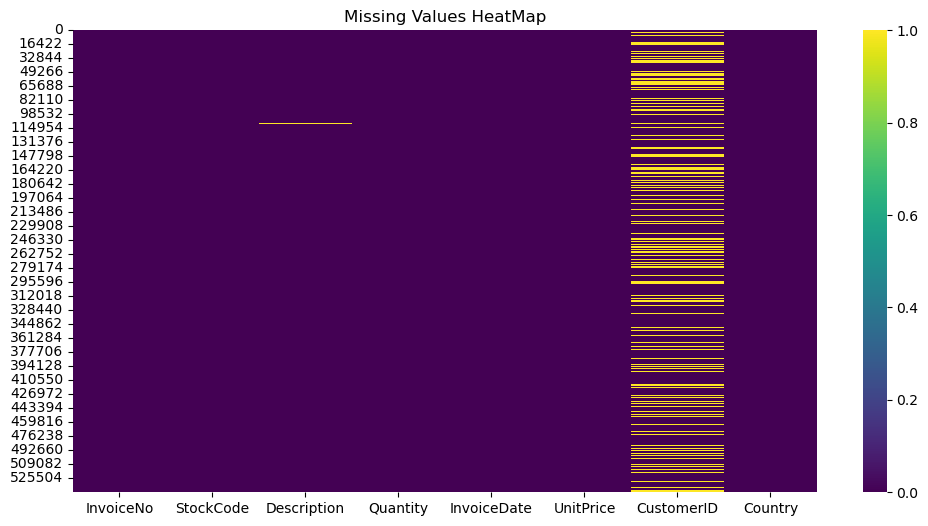

In [8]:
# Visualizing the missing values
plt.figure(figsize= (12,6))
sns.heatmap(df0.isna(), cmap = 'viridis', cbar = True)
plt.title("Missing Values HeatMap")
plt.show()

In [63]:
#!pip install missingno

In [64]:
import missingno as msno

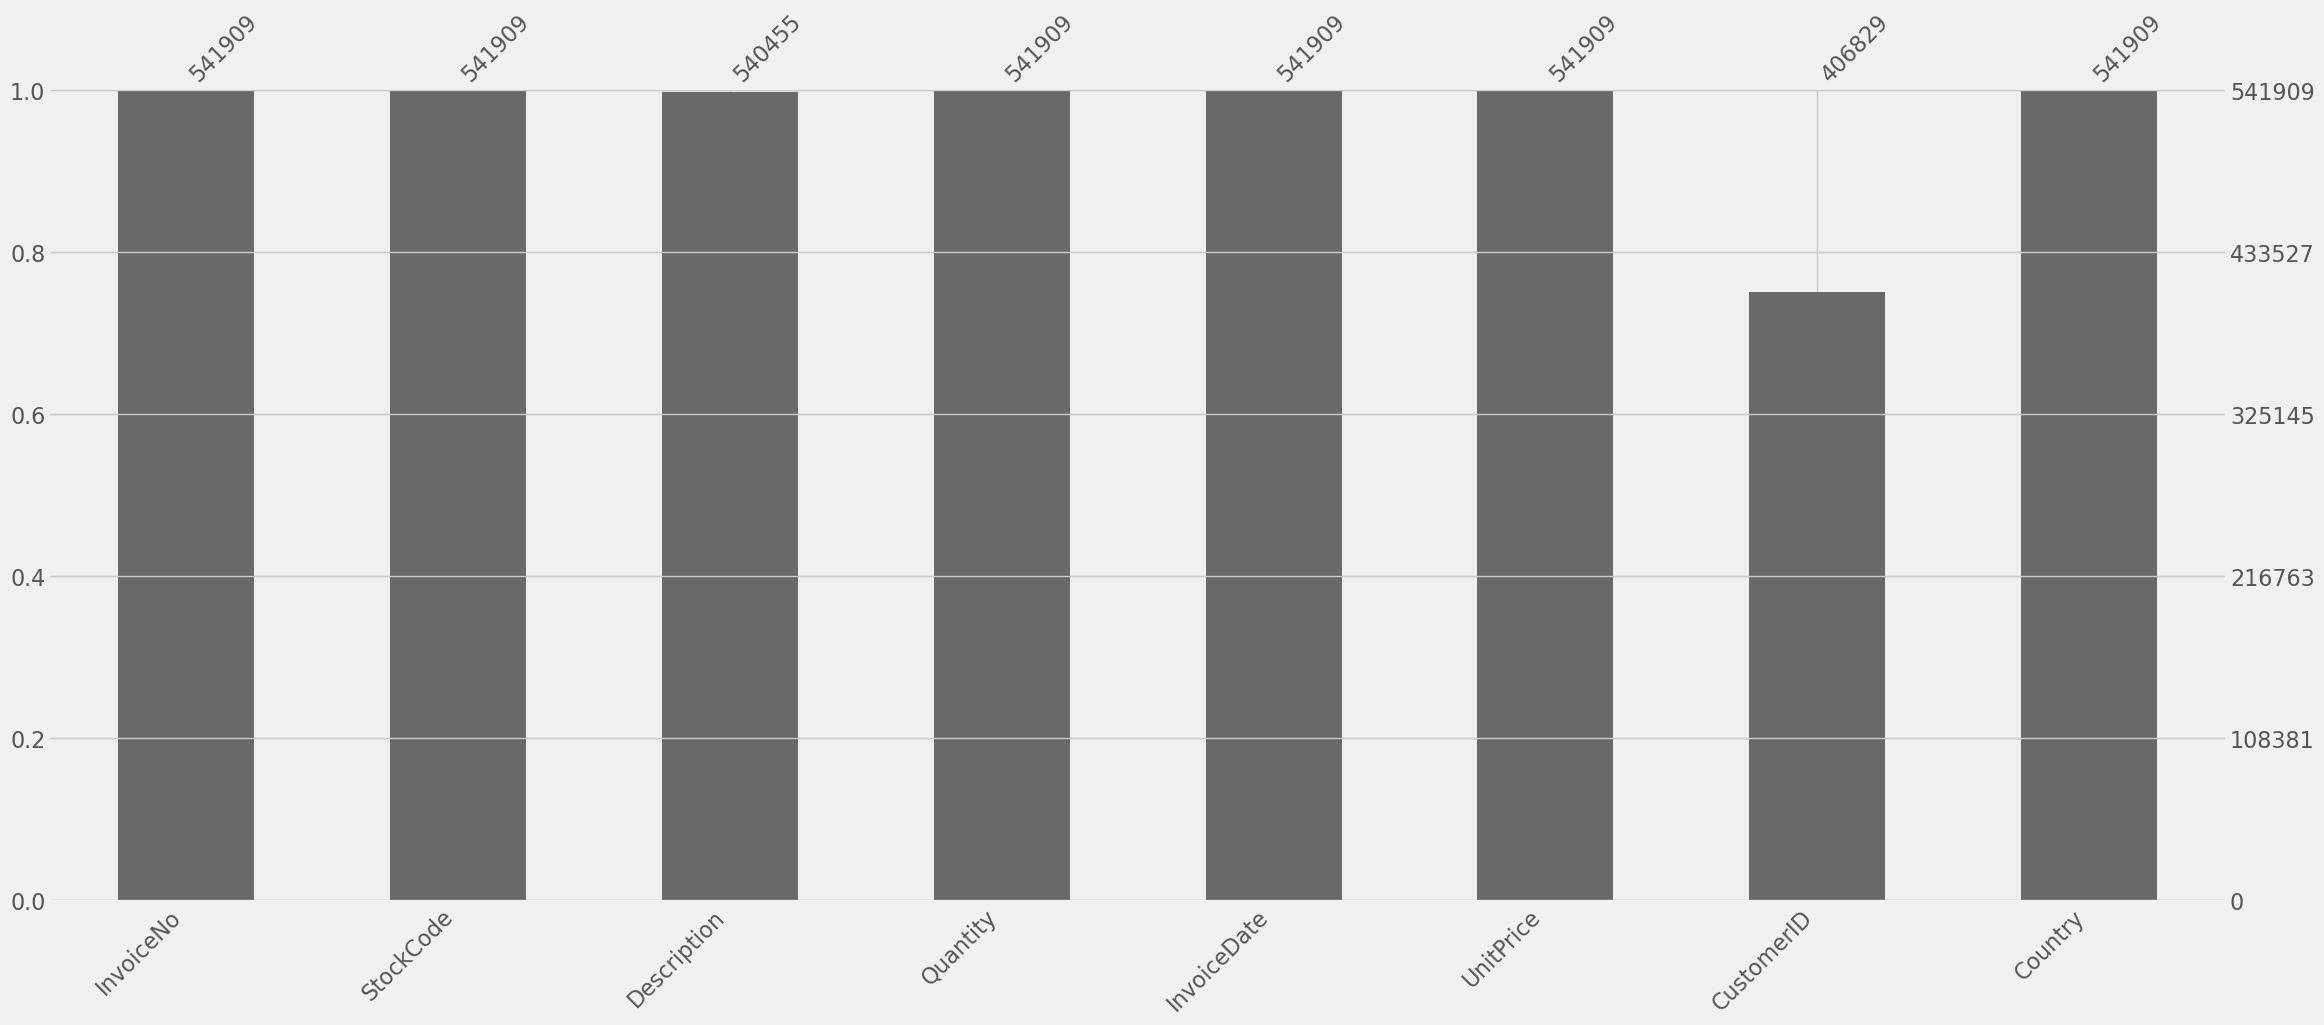

In [82]:
# bar chart for missing values per column
plt.style.use('fivethirtyeight')
msno.bar(df0)
plt.show()

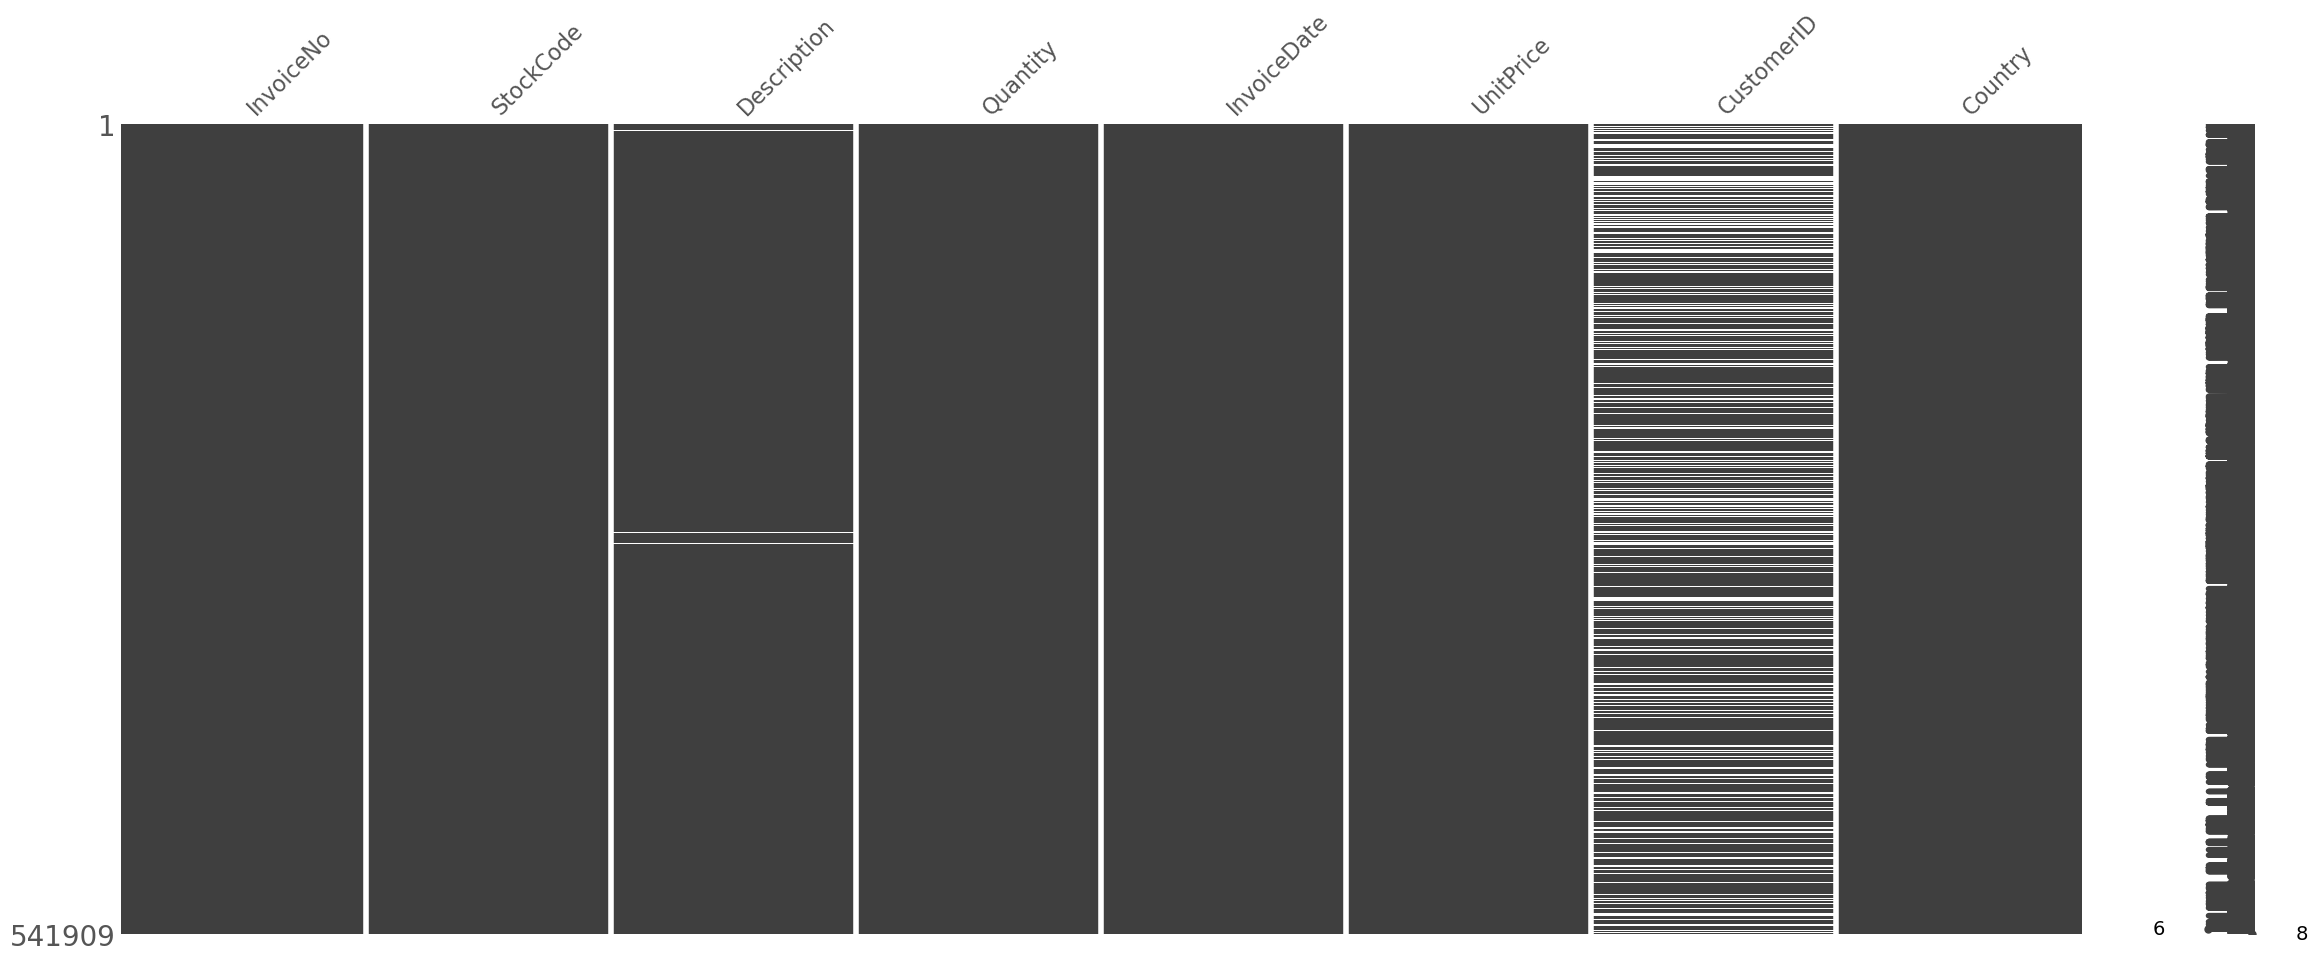

In [85]:
# matrix plot for missing values
plt.style.use('ggplot')
msno.matrix(df0)
plt.show()

## ***2. Understanding Your Variables***

In [67]:
# Dataset Columns
df0.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [68]:
# Dataset Describe
df0.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for col in df0.columns:
    unique_vals = df0[col].nunique()
    print(f"{col}: {unique_vals} unique_values")

InvoiceNo: 25900 unique_values
StockCode: 4070 unique_values
Description: 4223 unique_values
Quantity: 722 unique_values
InvoiceDate: 23260 unique_values
UnitPrice: 1630 unique_values
CustomerID: 4372 unique_values
Country: 38 unique_values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.

In [95]:
# count dupicate entries in 'Customer_id' column
df0['CustomerID'].isna().sum()

# we will remove rows with missing customer id after EDA.
 

np.int64(135080)

In [102]:
# check 'InvoiceNo' column 
df0[df0['InvoiceNo'].str.startswith('C', na = False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2022-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2022-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2022-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2023-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2023-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2023-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2023-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
# This 'C...' indicates cancelled invoices, so removing them as stated in the document.


In [114]:
# Check negative or zero prices and quantities.
df0[df0['Quantity'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2022-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2022-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2022-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2023-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2023-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2023-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2023-12-09 11:58:00,1.25,17315.0,United Kingdom


In [115]:
# Drop negative and zero value rows after EDA for 'Quantity' column.

In [113]:
# Check negative or zero prices and quantities.
df0[df0['UnitPrice'] <= 0.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2022-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2022-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2022-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2022-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2022-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2023-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2023-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2023-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2023-12-08 14:06:00,0.0,NaN,United Kingdom


In [116]:
# Drop negative and zero values rows after EDA for 'UnitPrice' column.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Analyze transaction volume by country

In [120]:
# Chart - 1 visualization code
# count transaction per country.
df0['Country'].value_counts().head(10)

Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: count, dtype: int64

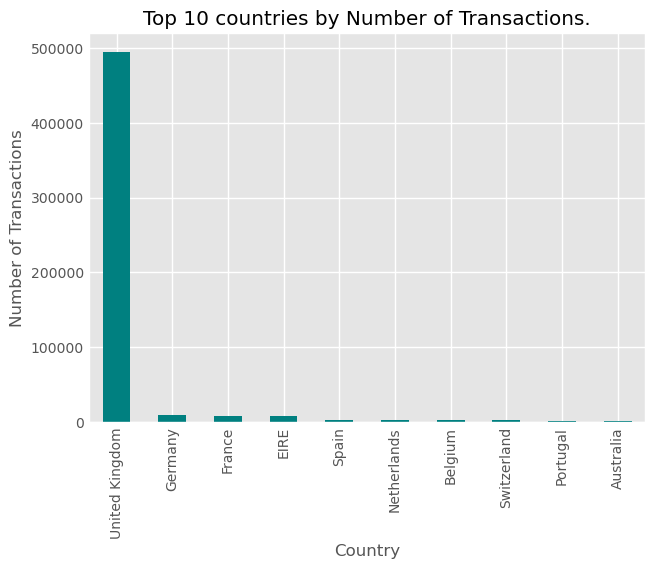

In [121]:
# Chart - 1 visualization code
country_counts  = df0['Country'].value_counts().head(10)

#plot the data
country_counts.plot(kind = 'bar', color = 'teal')
plt.title('Top 10 countries by Number of Transactions.')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.show()

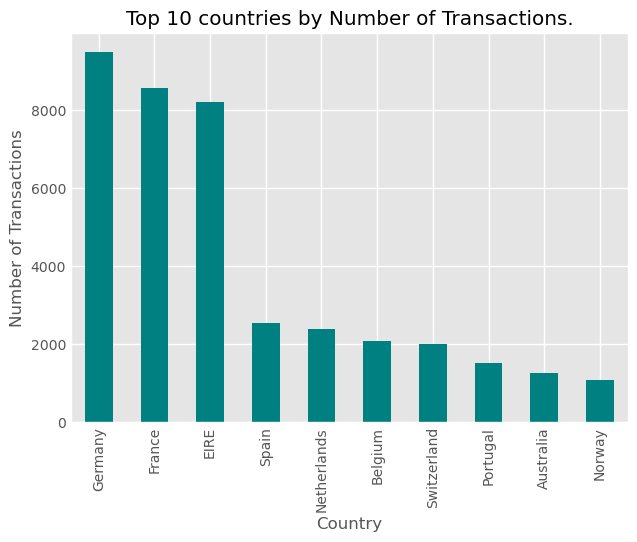

In [125]:
# Chart - 1 visualization code without UK
country_counts_No_UK  = df0['Country'][df0['Country'] != 'United Kingdom'].value_counts().head(10)

#plot the data
country_counts_No_UK.plot(kind = 'bar', color = 'teal')
plt.title('Top 10 countries by Number of Transactions.')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.show()

##### 1. Why did you pick the specific chart?

A **bar plot** can intuitively rank, highlight, and compare the transaction volume across countries. It can reflect where business activity is concentrated. 

##### 2. What is/are the insight(s) found from the chart?

- Likely, the United Kingdom dominates.
- Top 5 countries contribute the majority of transactions, while others have minor or niche activity.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact
- Focus marketing/supply chain on top-performing countries
- Use this for inventory planning or opening new warehouses.

Negative Impact
- Heavy reliance on one country (e.g., UK) is risky - if demand drops, global revenue may be impacted. Diversification can be explored.

#### Chart - 2 Identify top-selling products

In [132]:
# Chart - 2 visualization code

#Identify top 10 selling products
df0.groupby('Description')['Quantity'].sum().sort_values(ascending= False).head(10)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64

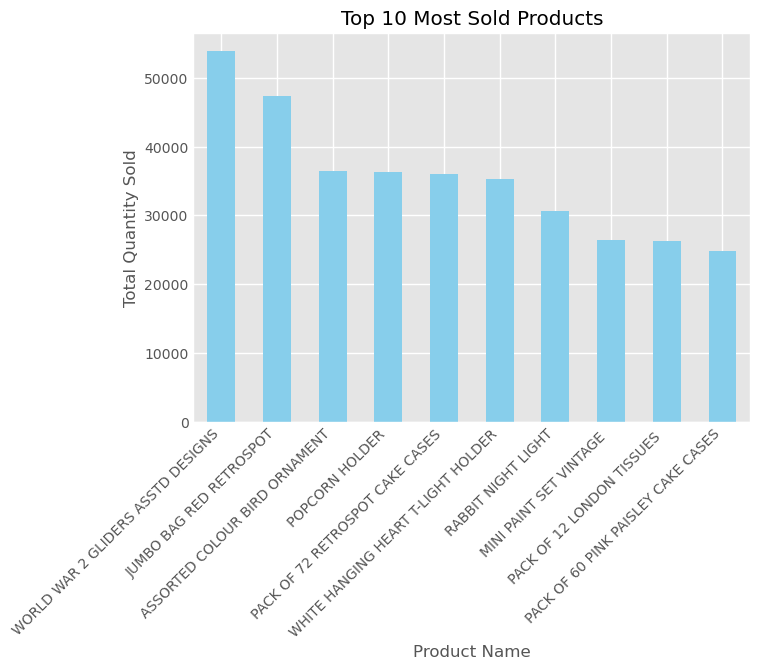

In [137]:
# plot the data
top_products = df0.groupby('Description')['Quantity'].sum().sort_values(ascending= False).head(10)

top_products.plot(kind = 'bar', color = 'skyblue')
plt.title('Top 10 Most Sold Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation = 45,ha = 'right')
plt.show()

##### 1. Why did you pick the specific chart?

A **bar chart** provides a clear ranking of products based on total sales volume. It can identify bestsellers, which is critical for product strategy and inventory planning.

##### 2. What is/are the insight(s) found from the chart?

- Few products account for significant sales volume.
- Top-selling products may be seasonal, gift items, or low-cost items.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact
- Prioritize restocking and promotion of high-ranking products.
- Bundle top products with slow movers to boost underperforming items.
- Data can guide product recommendation priorities.

Negative Impact
- Overdependence on a few products can lead to supply chain issues or product unavailability that can hurt revenue.
- Frequent sales of low-margin products can affect profitability in the long term if not managed.

#### Chart - 3 Visualize purchase trends over time

In [139]:
# Ensure 'Invoicedate' column is in datetime format only.
df0['InvoiceDate'].dtype

dtype('O')

In [3]:
# convert to datetime format
df0['InvoiceDate'] = pd.to_datetime(df0['InvoiceDate'])

# check datatype again
df0['InvoiceDate'].dtype

dtype('<M8[ns]')

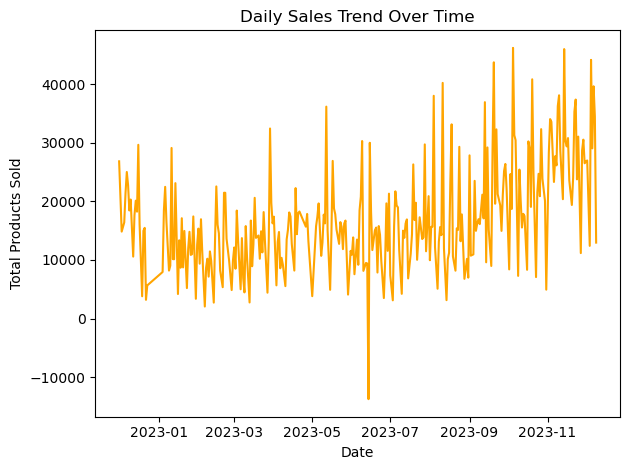

In [4]:
# Chart - 3 visualization code
# Group by Date and Sum quantity
daily_sales = df0.groupby(df0['InvoiceDate'].dt.date)['Quantity'].sum()

# plot daily sales trend
daily_sales.plot(color = 'orange')
plt.title('Daily Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Products Sold')
plt.tight_layout()
plt.show()

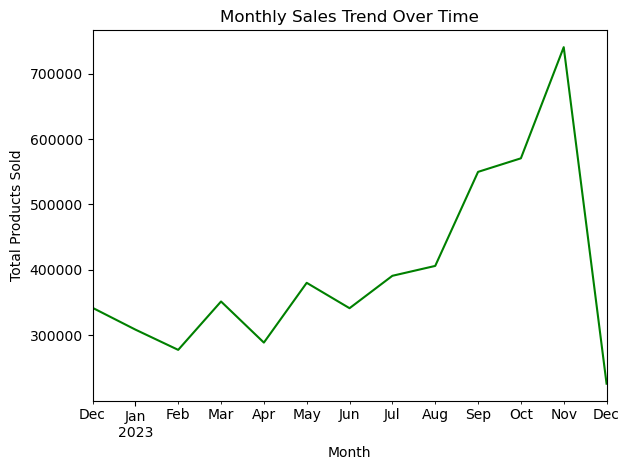

In [5]:
# Chart - 3 visualization code
# Group by Date and Sum quantity
monthly_sales = df0.groupby(df0['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()

# plot monthly sales trend
monthly_sales.plot(kind = 'line', color = 'green')
plt.title('Monthly Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Products Sold')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A **line chart** effectively shows time-based trends and helps identify seasonal patterns, sales spikes, or declines. It's critical for understanding demand cycles in e-commerce.

##### 2. What is/are the insight(s) found from the chart?

- Likely sales spikes before holidays or year-end. (eg. Oct, Nov, Dec)
- Possible slowdowns during mid-year.
- Helps identify peak sales periods for marketing campaigns and inventory stocking.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact
- Enable Seasonal Planning and resource planning.
- Adjust inventory levels to meet peak demand periods.
- Launch flash sales or discounts during slow months.

Negative Impact
- A sales dip may indicate customer churn or an external market change.
- If spikes are too short-lived, reliance on seasonal sales may hurt revenue stability.

#### Chart - 4 Inspect monetary distribution per transaction and customer.

In [6]:
# calculate total amount per transaction
df0['TotalPrice'] = df0['Quantity'] * df0['UnitPrice']

df0['TotalPrice'].describe()

count    541909.000000
mean         17.987795
std         378.810824
min     -168469.600000
25%           3.400000
50%           9.750000
75%          17.400000
max      168469.600000
Name: TotalPrice, dtype: float64

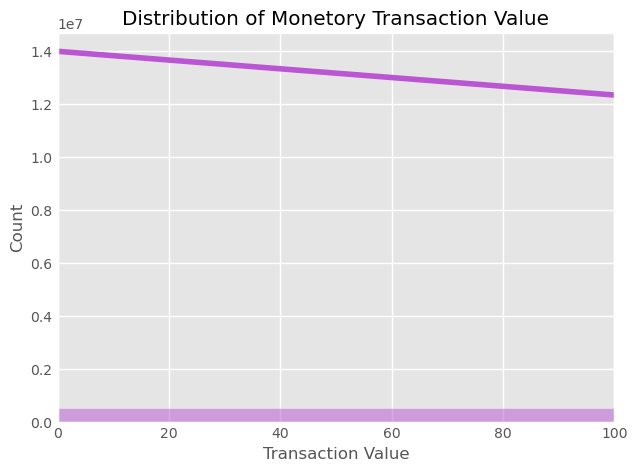

In [167]:
# Chart - 4 visualization code
# filter negative or zero values as the values are heavily skewed.
df0_pos_price = df0[df0['TotalPrice'] > 0]

# plot distribution
sns.histplot(df0_pos_price['TotalPrice'], bins = 100, kde = True, color = 'mediumorchid') #'purple'
plt.title("Distribution of Monetory Transaction Value")
plt.xlabel("Transaction Value")
plt.ylabel("Count")
plt.xlim(0,100)
plt.show()

In [185]:
df0[df0['TotalPrice'] > 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France,16.60


In [7]:
df0['CustomerID'].duplicated().sum()

np.int64(537536)

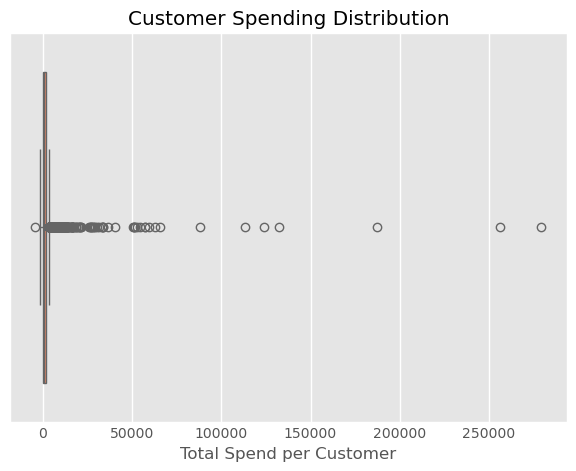

In [161]:
# Customer-wise total spending distribution
customer_spend = df0.groupby('CustomerID')['TotalPrice'].sum()

# Box Plot for customer spending distribution
sns.boxplot(x = customer_spend, color = 'coral')
plt.title("Customer Spending Distribution")
plt.xlabel("Total Spend per Customer")
plt.show()

##### 1. Why did you pick the specific chart?

- A **histogram** shows how much customers typically spend per transaction, which guides pricing, product bundling, and marketing strategies.
- **Box plot** gives a clear view of spending distribution across all customers, helps identify outliers and spending behavior diversity.

##### 2. What is/are the insight(s) found from the chart?

- Most transactions are small (under $100) — expected in retail.
- A few high-value transactions exist but are rare.
- Data is right-skewed, with many low-value transactions.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact
- Focus on volume sales of popular, low-cost items.
- Target high spenders separately for premium offers.

Negative Impact:
- If profit margins are thin, operational costs may eat into profits.
- Rare high-value transactions may indicate VIP customers, important to retain.

#### Chart - 5 RFM Distributions

In [18]:
# Chart - 5 visualization code

In [8]:
# cleaned dataset, drop missing values columns
df0_clean = df0.dropna(subset=['CustomerID']) 
df0_clean = df0_clean[df0_clean['TotalPrice'] > 0]

# for recency calculation use latest date
latest_date = df0_clean['InvoiceDate'].max()


In [9]:
# calculate Recency Frequency Monetory
rfm = df0_clean.groupby('CustomerID').agg({
     'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
  })

In [10]:
# rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetory']

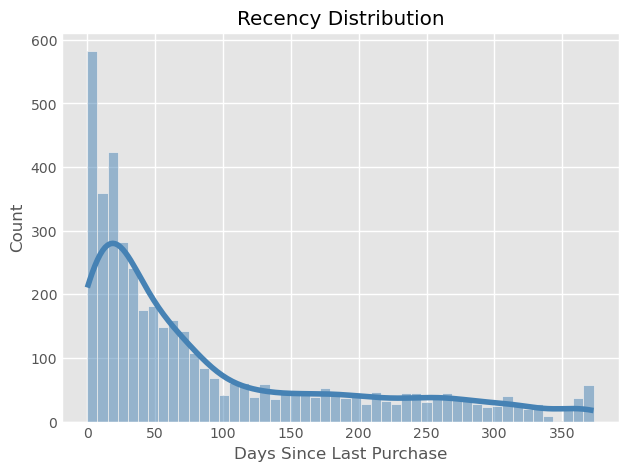

In [171]:
# plot recency distribution
sns.histplot(rfm['Recency'], bins = 50, kde = True, color = 'steelblue')
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.show()

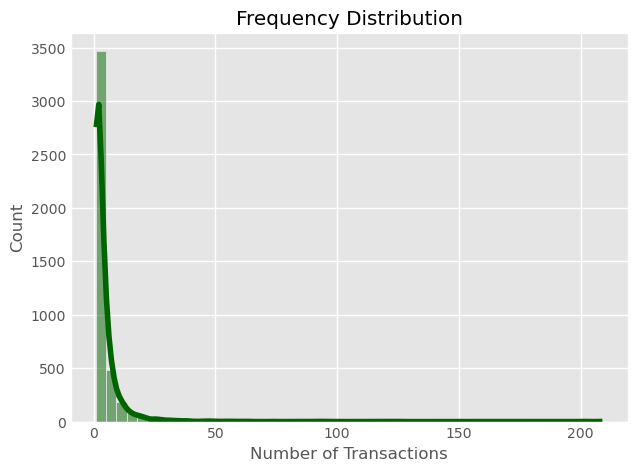

In [172]:
# plot frequency distribution
sns.histplot(rfm['Frequency'], bins = 50, kde = True, color = 'darkgreen')
plt.title('Frequency Distribution')
plt.xlabel('Number of Transactions')
plt.show()

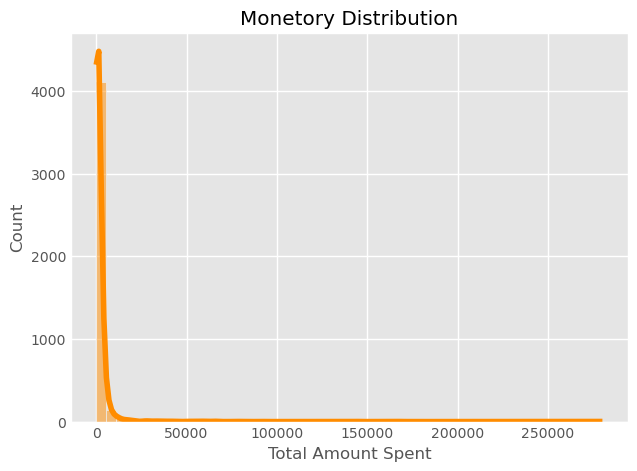

In [180]:
# plot monetary distribution
sns.histplot(rfm['Monetory'], bins = 50, kde = True, color = 'darkorange')
plt.title('Monetory Distribution')
plt.xlabel('Total Amount Spent')
plt.show()

##### 1. Why did you pick the specific chart?

**Histograms** are best for understanding distribution of numeric features. They help detect skewness, outliers, and customer behavior patterns — critical for segmentation.

##### 2. What is/are the insight(s) found from the chart?

**Recency:**
- Majority of customers are inactive recently (high recency values → days since last purchase are large).
- Few active customers (low recency).

**Frequency:**
- Most customers purchased only once or twice.
- Small group of frequent buyers — potential loyal customers.

**Monetary:**
- Spending is right-skewed.
- Many customers are low spenders, but few big spenders.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impacts:**
- Identify High-Value Loyal Customers → special offers, loyalty programs.
- Detect At-Risk Customers (high recency, low frequency) → run retention campaigns.
- Helps in targeted marketing using customer segments.

**Negative Impact:**
- If majority are low frequency and low spenders, need better engagement and product recommendation strategy.

#### Chart - 6 Elbow curve for cluster selection

In [11]:
# Chart - 6 visualization code

# Prepare data for clustering

# scale RFM features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

In [12]:
# make dataframe of RFM
rfm_scaled_df = pd.DataFrame(rfm_scaled, index = rfm.index, columns = rfm.columns)

In [178]:
# compute elbow curve
sse = []
k_range = range(1,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

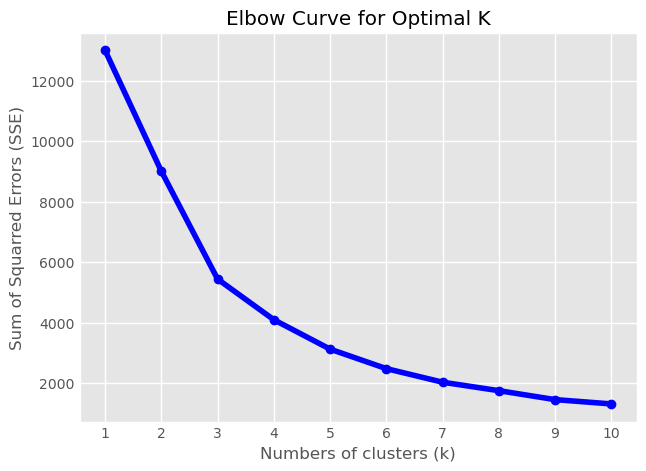

In [181]:
# Plot the elbow curve
plt.plot(k_range,sse, 'bo-')
plt.xlabel('Numbers of clusters (k)')
plt.ylabel('Sum of Squarred Errors (SSE)')
plt.title('Elbow Curve for Optimal K')
plt.xticks(k_range)
plt.show()

##### 1. Why did you pick the specific chart?

The **Elbow Curve** helps identify the optimal number of customer segments (k) for KMeans clustering. It ensures efficient segmentation without overfitting.

##### 2. What is/are the insight(s) found from the chart?

- The “elbow point” (where SSE reduction slows) indicates the ideal number of clusters.
- Typically found around k = 3 to 5 

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
- Accurate cluster count helps in creating meaningful customer segments (e.g., High-Value, Regular, At-Risk).
- Enables personalized marketing and resource allocation.

**Negative Impact:**
- Wrong k → poor segmentation, wasted marketing efforts.
- Too many clusters = over-segmentation, hard to act on insights

#### Chart - 7 Customer cluster profiles

In [190]:
# Chart - 7 visualization code

# Run KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Preview cluster assignments
print(rfm.head())
print("\nNumber of Unique Customers: ",len(rfm))

            Recency  Frequency  Monetory  Cluster
CustomerID                                       
12346.0         325          1  77183.60        3
12347.0           1          7   4310.00        0
12348.0          74          4   1797.24        0
12349.0          18          1   1757.55        0
12350.0         309          1    334.40        1

Number of Unique Customers:  4338


In [183]:
# Group by cluster and calculate mean RFM scores
cluster_profile = rfm.groupby('Cluster').mean().round(1)

# Add cluster sizes (number of customers per segment)
cluster_profile['CustomerCount'] = rfm['Cluster'].value_counts()

# Display profile
print(cluster_profile)

         Recency  Frequency  Monetory  CustomerCount
Cluster                                             
0           42.7        3.7    1359.0           3054
1          247.1        1.6     480.6           1067
2            6.4       82.5  127338.3             13
3           14.5       22.3   12709.1            204


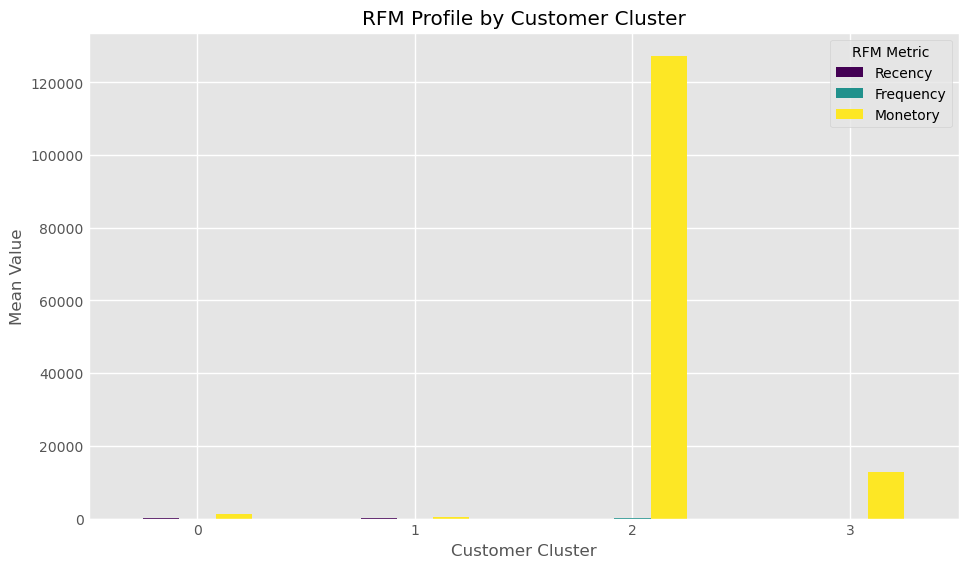

In [192]:
# Plot mean RFM values per cluster
cluster_profile[['Recency', 'Frequency', 'Monetory']].plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.title('RFM Profile by Customer Cluster')
plt.xlabel('Customer Cluster')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(title='RFM Metric')
plt.show()

Monetary values are dominating the chart, making Recency and Frequency almost invisible.
**Reason:** Monetary values are in thousands to hundred-thousands, while Recency/Frequency are small numbers.

In [194]:
# Normalize RFM Before Plotting

# Normalize RFM for visualization only
rfm_normalized = rfm[['Recency', 'Frequency', 'Monetory']].copy()
rfm_normalized = (rfm_normalized - rfm_normalized.min()) / (rfm_normalized.max() - rfm_normalized.min())
rfm_normalized['Cluster'] = rfm['Cluster']

# Group and plot
cluster_profile_norm = rfm_normalized.groupby('Cluster').mean()

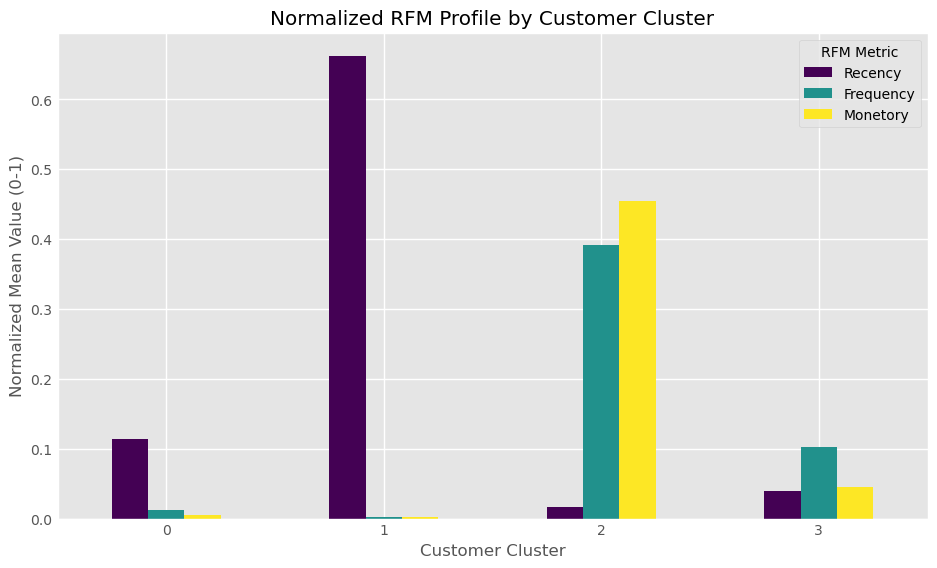

In [195]:
cluster_profile_norm.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.title('Normalized RFM Profile by Customer Cluster')
plt.xlabel('Customer Cluster')
plt.ylabel('Normalized Mean Value (0-1)')
plt.xticks(rotation=0)
plt.legend(title='RFM Metric')
plt.show()

In [196]:
rfm['Segment'] = rfm['Cluster'].map({
    2: 'High-Value',
    3: 'Regular',
    0: 'Occasional',
    1: 'At-Risk'
})


##### 1. Why did you pick the specific chart?

A **grouped bar chart** clearly shows how each customer cluster behaves in terms of recency, frequency, and monetary value. It’s ideal for comparing RFM dimensions across segments.

##### 2. What is/are the insight(s) found from the chart?

- High-Value customers are recent, frequent, big spenders.
- At-Risk customers haven’t purchased in long time and spend very little.
- Regular customers are consistent, but not premium.
- Occasional buyers rarely shop and spend little.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: 
- Helps target High-Value Customers with loyalty rewards.
- Run retention campaigns for At-Risk Customers.
- Upsell/cross-sell to Occasional or Regular Customers.

Negative Impact:
- Ignoring At-Risk Customers could lead to churn and lost revenue.
- Over-serving low-value clusters may waste marketing budget.

#### Chart - 8 Product recommendation heatmap / similarity matrix

In [13]:
# Chart - 8 visualization code

#Create Customer-Item Matrix

# Pivot table: Customers × Products
customer_product_matrix = df0_clean.pivot_table(
    index='Description', 
    columns='CustomerID', 
    values='Quantity', 
    aggfunc='sum', 
    fill_value=0
)

In [14]:
# Save Pivot Table: Customer x Products in pkl format.
customer_product_matrix.to_pickle("product_customer_pivot.pkl")

In [17]:
# Compute Item-Item Similarity (Cosine Similarity)

# Transpose: Products × Customers
product_similarity = cosine_similarity(customer_product_matrix)

# Convert to DataFrame for readability
product_similarity_df = pd.DataFrame(
    product_similarity, 
    index=customer_product_matrix.index, 
    columns=customer_product_matrix.index
)

In [18]:
# save product similarity matrix in pkl format.
product_similarity_df.to_pickle("product_similarity.pkl")

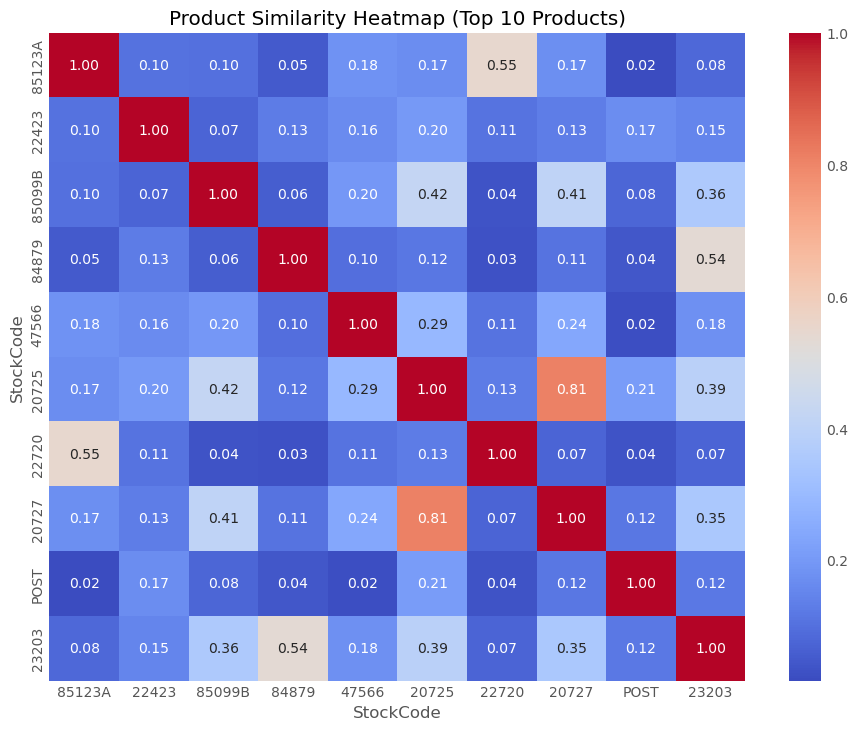

In [202]:
# Select top 10 popular products for heatmap
top_products = df0_clean['StockCode'].value_counts().head(10).index
similarity_top = product_similarity_df.loc[top_products, top_products]

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(similarity_top, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Product Similarity Heatmap (Top 10 Products)')
plt.show()

##### 1. Why did you pick the specific chart?

**Heatmaps** are great for visualizing pairwise similarities. It helps identify product clusters that customers often buy together → useful for recommendations.

##### 2. What is/are the insight(s) found from the chart?

- Products with high similarity scores (near 1) are frequently bought together.
- You can recommend these related items to customers based on what they already bought.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
- Enables cross-selling by recommending related products.
- Increases average order value and customer satisfaction.

**Negative Impact:**
- Poor similarity scores due to sparse data may lead to irrelevant recommendations.
- May require filtering low-similarity pairs to avoid noise.

In [204]:
# Function: Recommend similar products
def recommend_products(product_code, similarity_matrix, top_n=5):
    similar_scores = similarity_matrix[product_code].sort_values(ascending=False)
    similar_scores = similar_scores.drop(product_code) 
    return similar_scores.head(top_n)

# Example
recommend_products('85123A', product_similarity_df)

StockCode
21175    0.749651
21733    0.658732
82552    0.643868
82551    0.642480
23288    0.630982
Name: 85123A, dtype: float64

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### 1. Handling Missing Values

In [32]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [33]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [34]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

#### 1. Expand Contraction

In [35]:
# Expand Contraction

#### 2. Lower Casing

In [36]:
# Lower Casing

#### 3. Removing Punctuations

In [37]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [38]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [39]:
# Remove Stopwords

In [40]:
# Remove White spaces

#### 6. Rephrase Text

In [41]:
# Rephrase Text

#### 7. Tokenization

In [42]:
# Tokenization

#### 8. Text Normalization

In [43]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [44]:
# POS Taging

#### 10. Text Vectorization

In [45]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [46]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [47]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [48]:
# Transform Your data

### 6. Data Scaling

In [49]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [50]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [51]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [52]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***5. ML Model Implementation***

### ML Model - 1 Kmeans Clustering

In [217]:
# ML Model - 1 Implementation
# Step 1: Data Scaling
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetory']])

# Step 2: KMeans Clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# Fit the Algorithm
kmeans_labels = kmeans.fit_predict(rfm_scaled)
rfm['KMeans_Cluster'] = kmeans_labels


In [222]:
# Evaluate with Silhouette Score
kmeans_silhouette = silhouette_score(rfm_scaled, kmeans_labels)
print("KMeans Silhouette Score:", kmeans_silhouette)

KMeans Silhouette Score: 0.616212846765192


#### Explain the KMeans ML Model used and it's performance using Evaluation metric Score Chart.

- **Model:** Partition-based algorithm; minimizes within-cluster variance.

- **Performance:** Silhouette Score: 0.616 (strong clustering performance).Supports prediction on new data and Scalable and fast for large datasets.

- **Business Impact:**
1) Enables real-time customer segmentation.
2) Enables personalized marketing, retention of High-Value customers, and targeting At-Risk customers.
3) Drives sales and loyalty.

### ML Model - DBSCAN: Density Based Clustering

In [213]:
# ML Model - 1 Implementation
# Scale data
scaler = StandardScaler()
rfm_scaled_db = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetory']])

# Run DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the Algorithm
db_labels = dbscan.fit_predict(rfm_scaled_db)

# Add labels to RFM
rfm['DBSCAN_Cluster'] = db_labels
print(rfm['DBSCAN_Cluster'].value_counts())

DBSCAN_Cluster
 0    4284
-1      54
Name: count, dtype: int64


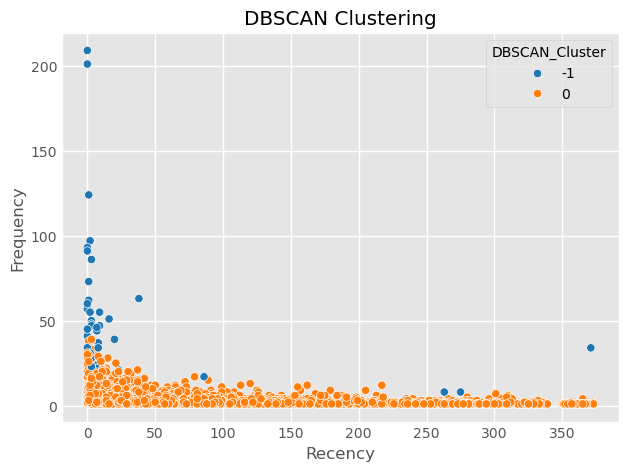

In [214]:
#Visualize DBSCAN Clusters (R vs F):
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='DBSCAN_Cluster', palette='tab10')
plt.title('DBSCAN Clustering')
plt.show()

In [224]:
#Evaluate

# Silhouette score only if more than 1 cluster is found
if len(set(db_labels)) > 1 and -1 in db_labels:
    dbscan_silhouette = silhouette_score(rfm_scaled, db_labels)
    print("DBSCAN Silhouette Score:", dbscan_silhouette)
else:
    print("DBSCAN found only one cluster or mostly noise. Silhouette score not applicable.")


DBSCAN Silhouette Score: 0.8387389400637124


Predict on the model
- **DBSCAN does not support .predict(); it's a limitation of density-based clustering.**

#### Explain the DBSCAN ML Model used and it's performance using Evaluation metric Score Chart.

- **Model:**  Density-based; identifies clusters of arbitrary shape and outliers (label -1).

- **Performance:** Silhouette Score: 0.839 (very high), but...may have identified a few large clusters or noise, not usable for marketing.Cannot predict on new data.

- **Business Impact:**
1) Good for fraud detection or niche behavior, not reliable for broad segmentation.
2) Not ideal for general customer segmentation in e-commerce.

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

Answer Here.

### ML Model - Hierarchical Clustering(Agglomerative)

In [215]:
# ML Model - 3 Implementation
agglo = AgglomerativeClustering(n_clusters=4)

# Fit the Algorithm
agglo_labels = agglo.fit_predict(rfm_scaled_db)

# Add labels
rfm['Hierarchical_Cluster'] = agglo_labels
print(rfm['Hierarchical_Cluster'].value_counts())

Hierarchical_Cluster
2    3325
3     949
0      56
1       8
Name: count, dtype: int64


In [ ]:
# Predict on the model

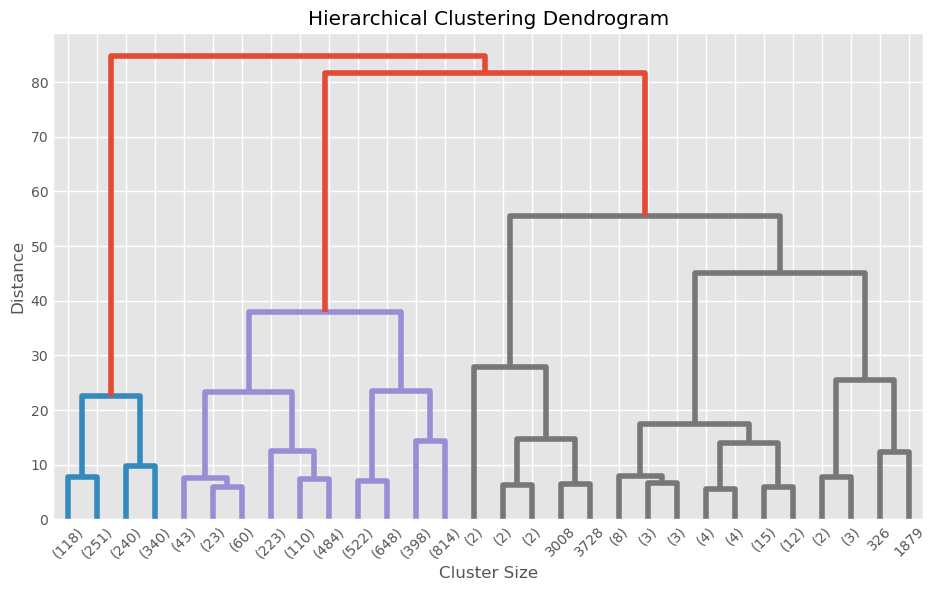

In [216]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Create linkage matrix
link = linkage(rfm_scaled_db, method='ward')

# Plot dendrogram (truncate to last 30 merges)
plt.figure(figsize=(10, 6))
dendrogram(link, truncate_mode='lastp', p=30)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()


In [225]:
#Evaluate
agglo_silhouette = silhouette_score(rfm_scaled, agglo_labels)
print("Hierarchical Silhouette Score:", agglo_silhouette)

Hierarchical Silhouette Score: 0.6065329601634818


Prediction on new data
- **Hierarchical clustering also cannot predict on new data. It requires full retraining for updated clustering.**

#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

- **Model:**  Tree-based (agglomerative), builds a dendrogram of clusters.

- **Performance:** Silhouette Score: 0.607 (moderate);Not scalable for large datasets; Cannot predict on new data.

- **Business Impact:**
1) Useful for small-scale customer analysis.
2) Not suitable for real-time or large-scale e-commerce applications.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I used the **Silhouette Score** because it quantifies how **well-separated** and **cohesive the clusters are**. Higher scores indicate **clear customer groups**, which helps in **targeted marketing and recommendation systems**. This ensures business actions are based on **distinct customer behaviors**, maximizing **ROI**.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I selected **KMeans** because:
- It achieved a **high silhouette score (0.616)** with interpretable clusters.
- It supports **real-time prediction on new customers**.
- It scales well with large data, making it **ideal for e-commerce**.
- The segments are **actionable**, supporting **marketing, retention, and upsell campaigns**.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

- **Model:** KMeans Clustering.
- **Features Used:** **Recency**, **Frequency**, and **Monetary (RFM)** scores.
- **Importance:**

1) **Recency:** Indicates **how recently a customer purchased** — useful to detect **at-risk customers**.

2) **Frequency:** Shows **purchase regularity** — helps identify **loyal or occasional buyers**.

3) **Monetary:** Reflects **spending level** — distinguishes **high-value vs low-value customers**.

Explainability:
Although clustering lacks traditional feature importance, **RFM distributions in clusters** can be visualized with:

<Axes: xlabel='KMeans_Cluster', ylabel='Monetory'>

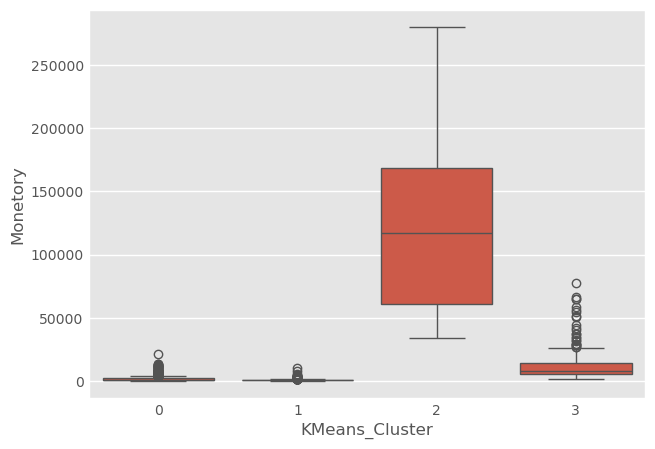

In [228]:
sns.boxplot(x='KMeans_Cluster', y='Monetory', data=rfm)

This helps **understand how each feature drives customer segmentation**, aligning with **business goals**.

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [230]:
# Save the File# Step 4: Save KMeans model and scaler
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model and scaler saved successfully.")

Model and scaler saved successfully.


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [232]:
# =============================
# Load the Saved Model and Predict on New Data
# =============================

# Load model and scaler
loaded_kmeans = joblib.load('kmeans_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# Example new data for sanity check (simulate unseen customer data)
new_data = pd.DataFrame({
    'Recency': [20, 200],
    'Frequency': [10, 1],
    'Monetory': [500, 50]
})

# Scale new data
new_scaled = loaded_scaler.transform(new_data)

# Predict cluster for new data
new_clusters = loaded_kmeans.predict(new_scaled)
print("Predicted clusters for new data:", new_clusters)


Predicted clusters for new data: [0 1]


In [233]:
# =============================
# Scatter Plot of Clusters with Segment Labels
# =============================

# Map cluster numbers to segment labels based on RFM interpretation
cluster_labels_map = {
    0: 'High-Value',
    1: 'Regular',
    2: 'Occasional',
    3: 'At-Risk'
}

In [234]:
# Assign labels (you may need to inspect rfm.groupby('KMeans_Cluster').mean() to adjust mapping)
rfm['Segment_Label'] = rfm['KMeans_Cluster'].map(cluster_labels_map)

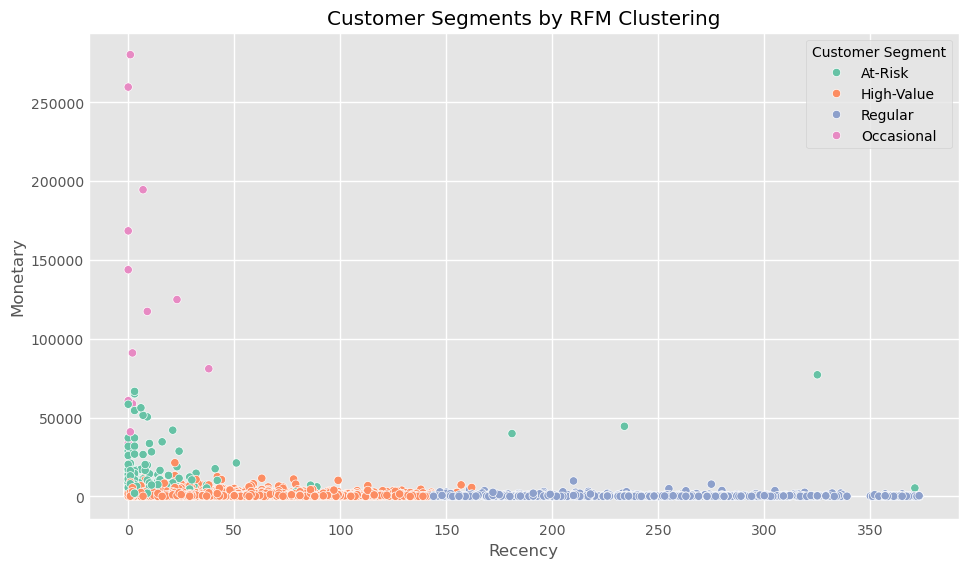

In [236]:
# Scatter Plot: Recency vs Monetary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetory', hue='Segment_Label', palette='Set2')
plt.title('Customer Segments by RFM Clustering')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend(title='Customer Segment')
plt.show()

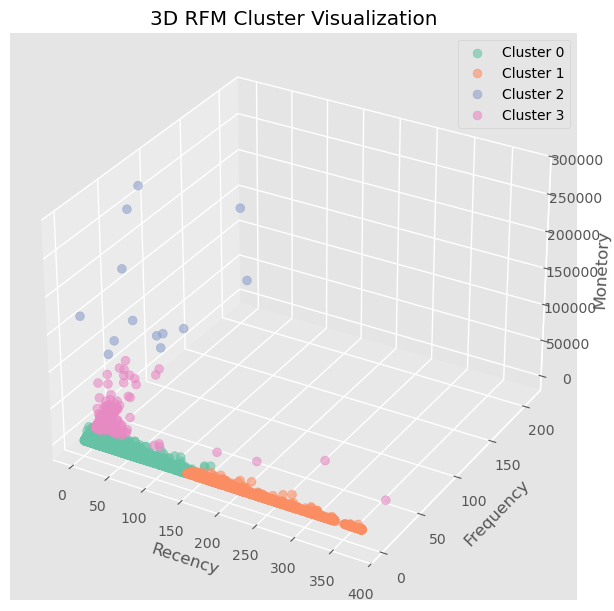

In [238]:
# =============================
# 3D Scatter Plot of Clusters with RFM
# =============================

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
colors = sns.color_palette('Set2', n_colors=4)

# Map cluster labels to colors
for cluster in range(4):
    subset = rfm[rfm['KMeans_Cluster'] == cluster]
    ax.scatter(subset['Recency'], subset['Frequency'], subset['Monetory'], 
               label=f'Cluster {cluster}', s=40, alpha=0.6, color=colors[cluster])

ax.set_title('3D RFM Cluster Visualization')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetory')
ax.legend()
plt.show()


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project successfully demonstrates the integration of unsupervised machine learning and recommendation systems in a real-world e-commerce setting. It highlights the power of data-driven strategies for enhancing customer experience, improving marketing ROI, and driving business growth. The project was fully deployed as an interactive web app, ready for end-user interaction and further scaling.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***